

## Aditya Patel

## Data Preprocessing, Linear Regression with Gradient Descent


We will use the New York City Taxi trip reports in the Year 2013. 
The dataset was released under the FOIL (The Freedom of Information Law) and made public by Chris Whong (\url{https://chriswhong.com/open-data/foil_nyc_taxi/}).



# Taxi Data Set
The data set itself is a simple text file. Each taxi trip report is a different line in the file. Among other things, each trip report 
includes the starting point, the drop-off point, corresponding timestamps, and information related to the payment. The data are reported 
by the time that the trip ended, i.e., upon arriving in the order of the drop-off timestamps. 
The attributes present on each line of the file are, in order:



| index | **Attribute** | **Description** |
| --- | --- | --- |
| 0 | medallion           |  an md5sum of the identifier of the taxi - vehicle bound (Taxi ID)  | 
| 1 | hack license       |  an md5sum of the identifier for the taxi license (Driver ID)  |  
| 2 | pickup datetime    | time when the passenger(s) were picked up  |  
| 3 | dropoff datetime   | time when the passenger(s) were dropped off  | 
| 4 | trip time in secs | duration of the trip  |  
| 5 | trip distance | trip distance in miles  |  
| 6 | pickup longitude | longitude coordinate of the pickup location  |  
| 7 | pickup latitude | latitude coordinate of the pickup location  |  
| 8 | dropoff longitude | longitude coordinate of the drop-off location   |  
| 9 | dropoff latitude | latitude coordinate of the drop-off location  | 
| 10 | payment type | the payment method -credit card or cash  |  
| 11 | fare amount | fare amount in dollars  |  
| 12 | surcharge | surcharge in dollars  |  
| 13 | mta tax | tax in dollars  |  
| 14 | tip amount | tip in dollars  |  
| 15 | tolls amount | bridge and tunnel tolls in dollars  |  
| 16 | total amount | total paid amount in dollars  |  




The data files are in comma separated values (CSV) format. Example lines from the file are:

07290D3599E7A0D62097A346EFCC1FB5,E7750A37CAB07D0DFF0AF7E3573AC141,\\
2013-01-01,00:00:00,2013-01-01 00:02:00,120,0.44,-73.956528,40.716976,-73.962440,\\
40.715008,CSH,3.50,0.50,0.50,0.00,0.00,4.50

22D70BF00EEB0ADC83BA8177BB861991,3FF2709163DE7036FCAA4E5A3324E4BF,\\
2013-01-01,00:02:00,2013-01-01 00:02:00,0,0.00,0.000000,0.000000,0.000000,0.000000,\\
CSH,27.00,0.00,0.50,0.00,0.00,27.50

0EC22AAF491A8BD91F279350C2B010FD,778C92B26AE78A9EBDF96B49C67E4007,\\
2013-01-01,00:01:00,2013-01-01 00:03:00,120,0.71,-73.973145,40.752827,-73.965897\\
73.965897,40.760445,CSH,4.00,0.50,0.50,0.00,0.00,5.00



In [3]:
# Standard Headers
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
df = pd.read_csv('nyc-taxi-data.csv.bz2')
df

,07290D3599E7A0D62097A346EFCC1FB5,E7750A37CAB07D0DFF0AF7E3573AC141,2013-01-01 00:00:00,2013-01-01 00:02:00,120,0.44,-73.956528,40.716976,-73.962440,40.715008,CSH,3.50,0.50,0.50.1,0.00,0.00.1,4.50
0,22D70BF00EEB0ADC83BA8177BB861991,3FF2709163DE7036FCAA4E5A3324E4BF,2013-01-01 00:02:00,2013-01-01 00:02:00,0,0.00,0.000000,0.000000,0.000000,0.000000,CSH,27.0,0.0,0.5,0.00,0.0,27.50
1,0EC22AAF491A8BD91F279350C2B010FD,778C92B26AE78A9EBDF96B49C67E4007,2013-01-01 00:01:00,2013-01-01 00:03:00,120,0.71,-73.973145,40.752827,-73.965897,40.760445,CSH,4.0,0.5,0.5,0.00,0.0,5.00
2,1390FB380189DF6BBFDA4DC847CAD14F,BE317B986700F63C43438482792C8654,2013-01-01 00:01:00,2013-01-01 00:03:00,120,0.48,-74.004173,40.720947,-74.003838,40.726189,CSH,4.0,0.5,0.5,0.00,0.0,5.00
3,3B4129883A1D05BE89F2C929DE136281,7077F9FD5AD649AEACA4746B2537E3FA,2013-01-01 00:01:00,2013-01-01 00:03:00,120,0.61,-73.987373,40.724861,-73.983772,40.730995,CRD,4.0,0.5,0.5,0.00,0.0,5.00
4,5FAA7F69213D26A42FA435CA9511A4FF,00B7691D86D96AEBD21DD9E138F90840,2013-01-01 00:02:00,2013-01-01 00:03:00,60,0.00,0.000000,0.000000,0.000000,0.000000,CRD,2.5,0.5,0.5,0.25,0.0,3.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,A0AFE6B722F15B7A0FDFEEA954BE316A,93D505C96BD248DC390FD47F747D762D,2013-01-01 03:44:00,2013-01-01 03:46:00,120,0.79,-73.963593,40.710941,-74.027779,40.629894,CSH,4.5,0.5,0.5,0.00,0.0,5.50
49995,A0DEAEC3D5592AE94B876356F12F8158,6A35995FBD5399AB131B89623C344782,2013-01-01 03:35:00,2013-01-01 03:46:00,660,2.41,-73.955833,40.768272,-73.987724,40.775490,CRD,10.0,0.5,0.5,2.10,0.0,13.10
49996,A154EFA0695A29423B078C7F5D5B2CB5,F38E7C3381F28C9B3E51C0B6DDBDF68A,2013-01-01 03:40:00,2013-01-01 03:46:00,360,1.63,-73.963951,40.709934,-73.949364,40.695381,CRD,7.0,0.5,0.5,2.25,0.0,10.25
49997,A2B97CECFEA4C8DE45D8FC251E80AF1D,68AE01DDBDEDDFF772905561744A1072,2013-01-01 03:34:00,2013-01-01 03:46:00,720,4.04,-73.952759,40.776524,-73.983093,40.738796,CRD,14.5,0.5,0.5,3.00,0.0,18.50


## Task - 1
The dataset is a real-world dataset and many records are incorrect and wrong. We perform some clean up tasks as part of preprocessing.


1.] We Give headers to all the columns

In [5]:
df.columns = ["medallion","hack_license","pickup_datetime", "dropoff_datetime ","trip_time_in_secs","trip_distance","pickup_longitude","pickup_latitude","dropoff_longitude","dropoff_latitude","payment_type","fare_amount","surcharge","mta_tax","tip_amount","tolls_amount","total_amount"]
df


,medallion,hack_license,pickup_datetime,dropoff_datetime,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
0,22D70BF00EEB0ADC83BA8177BB861991,3FF2709163DE7036FCAA4E5A3324E4BF,2013-01-01 00:02:00,2013-01-01 00:02:00,0,0.00,0.000000,0.000000,0.000000,0.000000,CSH,27.0,0.0,0.5,0.00,0.0,27.50
1,0EC22AAF491A8BD91F279350C2B010FD,778C92B26AE78A9EBDF96B49C67E4007,2013-01-01 00:01:00,2013-01-01 00:03:00,120,0.71,-73.973145,40.752827,-73.965897,40.760445,CSH,4.0,0.5,0.5,0.00,0.0,5.00
2,1390FB380189DF6BBFDA4DC847CAD14F,BE317B986700F63C43438482792C8654,2013-01-01 00:01:00,2013-01-01 00:03:00,120,0.48,-74.004173,40.720947,-74.003838,40.726189,CSH,4.0,0.5,0.5,0.00,0.0,5.00
3,3B4129883A1D05BE89F2C929DE136281,7077F9FD5AD649AEACA4746B2537E3FA,2013-01-01 00:01:00,2013-01-01 00:03:00,120,0.61,-73.987373,40.724861,-73.983772,40.730995,CRD,4.0,0.5,0.5,0.00,0.0,5.00
4,5FAA7F69213D26A42FA435CA9511A4FF,00B7691D86D96AEBD21DD9E138F90840,2013-01-01 00:02:00,2013-01-01 00:03:00,60,0.00,0.000000,0.000000,0.000000,0.000000,CRD,2.5,0.5,0.5,0.25,0.0,3.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,A0AFE6B722F15B7A0FDFEEA954BE316A,93D505C96BD248DC390FD47F747D762D,2013-01-01 03:44:00,2013-01-01 03:46:00,120,0.79,-73.963593,40.710941,-74.027779,40.629894,CSH,4.5,0.5,0.5,0.00,0.0,5.50
49995,A0DEAEC3D5592AE94B876356F12F8158,6A35995FBD5399AB131B89623C344782,2013-01-01 03:35:00,2013-01-01 03:46:00,660,2.41,-73.955833,40.768272,-73.987724,40.775490,CRD,10.0,0.5,0.5,2.10,0.0,13.10
49996,A154EFA0695A29423B078C7F5D5B2CB5,F38E7C3381F28C9B3E51C0B6DDBDF68A,2013-01-01 03:40:00,2013-01-01 03:46:00,360,1.63,-73.963951,40.709934,-73.949364,40.695381,CRD,7.0,0.5,0.5,2.25,0.0,10.25
49997,A2B97CECFEA4C8DE45D8FC251E80AF1D,68AE01DDBDEDDFF772905561744A1072,2013-01-01 03:34:00,2013-01-01 03:46:00,720,4.04,-73.952759,40.776524,-73.983093,40.738796,CRD,14.5,0.5,0.5,3.00,0.0,18.50


2.] If the trip distance is less than 1 and total amount is more than 20, there is clearly an error in the collection of data, so we drop these rows

In [6]:
index_names0 = df[(df.trip_distance <= 1) & (df.total_amount >= 20)].index
df.drop(index_names0, inplace = True)



3.] If the mta tax is not equal to 0.5, we remove the particular row since that is the 
 New York State tax meant to be charged on all rides and if it is not charged then that entry should be void.

In [7]:
index_names1 = df[df.mta_tax != 0.5].index
df.drop(index_names1, inplace = True)



3.] If the trip distance is 0 and the total fare is greater than 0, we remove the particular row since 
that would clearly mean there was an error in collection.

In [8]:

index_names2 = df[(df.trip_distance == 0) & (df.total_amount > 0 )].index
df.drop(index_names2, inplace = True)

## Task - 2
We use the cleaned dataset from task 1 and find out the correlations between trip distance, travel time and fare amount. We visualize the correlations in form of Scatterplot matrix. 


Correlation coefficient for trip distance, fare amount: 0.9545009496372654
There seems to be the strongest correlation between trip distance and fare amount, which logically makes sense since the fare amount in taxis is must depend on the distance travelled and implies they are linearly related.


Correlation coefficient for travel time, fare amount: 0.8678801448521918
The second strongest correlation is between travel time and fare amount, which almost have a linear relatinship, and as can be seen from the scatterplot, they have a more linear relationship for lower times and distribution gets spread out as the time gets higher possibly because of traffic, waiting etc.


Correlation coefficient for trip distance, travel time: 0.7750751729273796
Trip distance and travel time have a correlation coefficient of 0.77, which implies they are not as closesly linearly related as the other two pairs, and this can be because of traffic, areas in which the taxis have been driven.


array([[<AxesSubplot:xlabel='trip_distance', ylabel='trip_distance'>,
        <AxesSubplot:xlabel='fare_amount', ylabel='trip_distance'>,
        <AxesSubplot:xlabel='trip_time_in_secs', ylabel='trip_distance'>],
       [<AxesSubplot:xlabel='trip_distance', ylabel='fare_amount'>,
        <AxesSubplot:xlabel='fare_amount', ylabel='fare_amount'>,
        <AxesSubplot:xlabel='trip_time_in_secs', ylabel='fare_amount'>],
       [<AxesSubplot:xlabel='trip_distance', ylabel='trip_time_in_secs'>,
        <AxesSubplot:xlabel='fare_amount', ylabel='trip_time_in_secs'>,
        <AxesSubplot:xlabel='trip_time_in_secs', ylabel='trip_time_in_secs'>]],
      dtype=object)

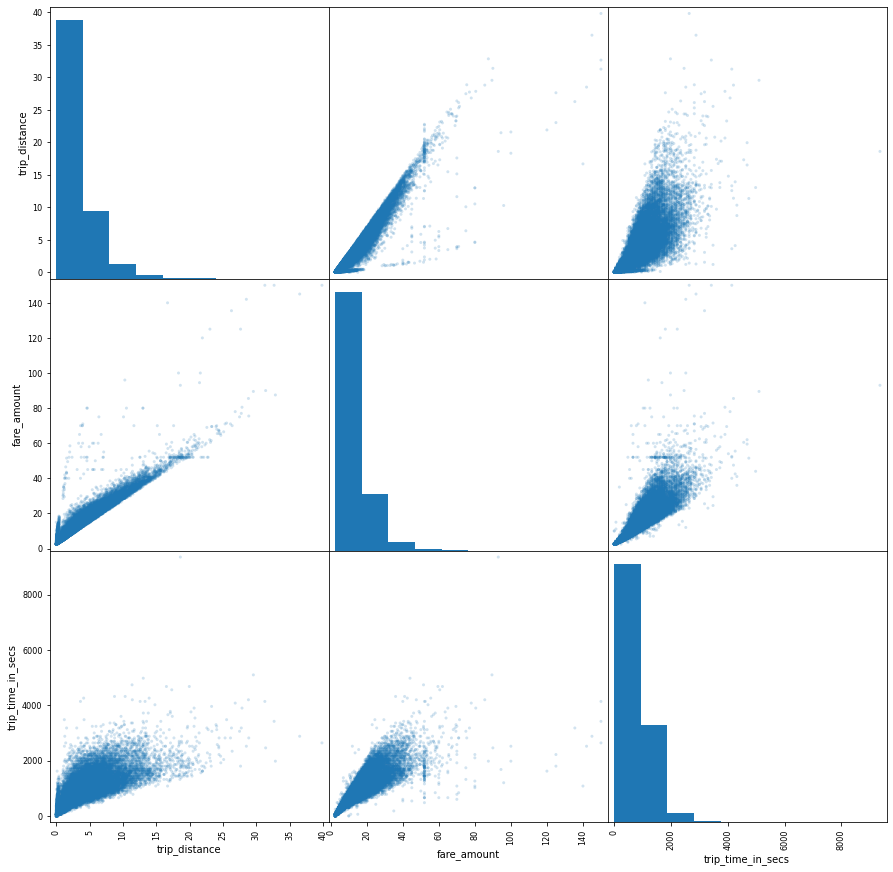

In [10]:
trip_dist = df["trip_distance"]
fare_amount = df["fare_amount"]
travel_time = df["trip_time_in_secs"]


print("Correlation coefficient for trip distance, fare amount:",trip_dist.corr(fare_amount, method = "pearson"))
print("There seems to be the strongest correlation between trip distance and fare amount, which logically makes sense since the fare amount in taxis is must depend on the distance travelled and implies they are linearly related.\n\n")


print("Correlation coefficient for travel time, fare amount:",travel_time.corr(fare_amount, method = "pearson"))
print("The second strongest correlation is between travel time and fare amount, which almost have a linear relatinship, and as can be seen from the scatterplot, they have a more linear relationship for lower times and distribution gets spread out as the time gets higher possibly because of traffic, waiting etc.\n\n")


print("Correlation coefficient for trip distance, travel time:",trip_dist.corr(travel_time, method = "pearson"))
print("Trip distance and travel time have a correlation coefficient of 0.77, which implies they are not as closesly linearly related as the other two pairs, and this can be because of traffic, areas in which the taxis have been driven.")


pd.plotting.scatter_matrix(df[["trip_distance","fare_amount","trip_time_in_secs"]], alpha=0.2, figsize = (15,15))




## Task - 3
We use the cleaned dataset from task 1.
We want to find a simple line to our data (distance, money). 
We want to use trip distance, and fare amount. 

We can then fit a linear regression model.
Using the model, we calculate, for example, the fare for a 3 mile trip


Slope: [2.82914123] Intercept: 3.7789172189740103
Equation: Y = 2.829X + 3.779
The fare amount for a 3 miles trip according to the linear regression model is $12.2663


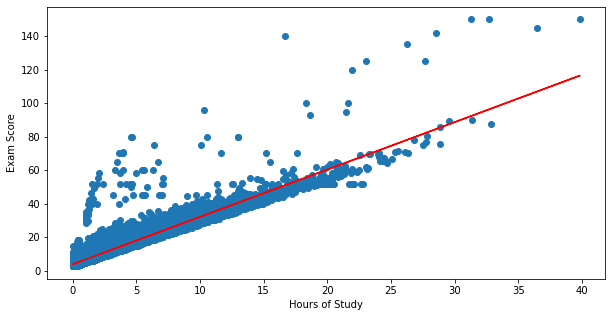

In [13]:

from sklearn.linear_model import LinearRegression

my_X = np.vstack((trip_dist, )).T


#regression
reg = LinearRegression().fit(my_X, fare_amount)
print("Slope:",reg.coef_,"Intercept:", reg.intercept_)
print("Equation: Y = {:.3f}X + {:.3f}".format(float(reg.coef_),float(reg.intercept_)))




reg.score(my_X, fare_amount)


prediction0 = reg.predict([[3]])
float(prediction0)
print("The fare amount for a 3 miles trip according to the linear regression model is ${:.4f}".format(float(prediction0)))
           
fig = plt.figure(figsize = (10,5))
plt.scatter(trip_dist, fare_amount)
plt.plot(trip_dist, reg.predict(my_X), c = "red")

plt.xlabel("Hours of Study")
plt.ylabel("Exam Score")
plt.show()
     
           
           

## Task - 4
We fit a Multiple Linear Regression hyperplane into this data. We are interested to predict total amount out of trip distance, tavel time. 


* We use our model to predict the total amount for a 3 miles trip and 6 min travel time. 

In [16]:
from sklearn.linear_model import LinearRegression

x1 = df[["trip_distance","trip_time_in_secs"]]
y1 = df["total_amount"]

reg1 = LinearRegression().fit(x1,y1)
print("Slope:",reg1.coef_,"Intercept:", reg1.intercept_)
print("Multiple Linear Regression Equation: Y = " + str(round(reg1.intercept_,3)) + " + " + str(round(reg1.coef_[0],3)) + "X1 + " + str(round(reg1.coef_[1],3)) + "X2")

prediction1 = reg1.predict([[2,3]])

print("For a 3 mile trip and 6 minute travel time, total fare = $" + str(round(float(prediction1),3)))



Slope: [2.36701309 0.00566076] Intercept: 3.0948445074254707
Multiple Linear Regression Equation: Y = 3.095 + 2.367X1 + 0.006X2
For a 3 mile trip and 6 minute travel time, total fare = $7.846


## Task - 5 - Gradient Descent
We implement the gradient descent optimization to find the optimal parameters for our Simple Linear Regression model of task 3.


Sample size 49413.0
Iteration No.= 0  m =  0.061331428233460855  c= 0.01260510614615587  Cost= 227.22602214194646
Iteration No.= 10  m =  0.6166176020906815  c= 0.12802463363473382  Cost= 160.92490969689575
Iteration No.= 20  m =  1.0788869340879237  c= 0.22639526198870658  Cost= 114.884527451757
Iteration No.= 30  m =  1.4636551872813945  c= 0.31055107948126176  Cost= 82.91011705367454
Iteration No.= 40  m =  1.783850283651213  c= 0.38285352478162304  Cost= 60.701008506710956
Iteration No.= 50  m =  2.0502439233985337  c= 0.4452702187757915  Cost= 45.27148987737271
Iteration No.= 60  m =  2.2718112155853984  c= 0.49944064823420004  Cost= 34.54874999716701
Iteration No.= 70  m =  2.456030326917781  c= 0.5467308942724487  Cost= 27.09375289796195
Iteration No.= 80  m =  2.609132152889289  c= 0.5882792327955292  Cost= 21.90745677296793
Iteration No.= 90  m =  2.7363083469257132  c= 0.6250341293635915  Cost= 18.296282798494037
Iteration No.= 100  m =  2.8418846528908395  c= 0.6577858969938

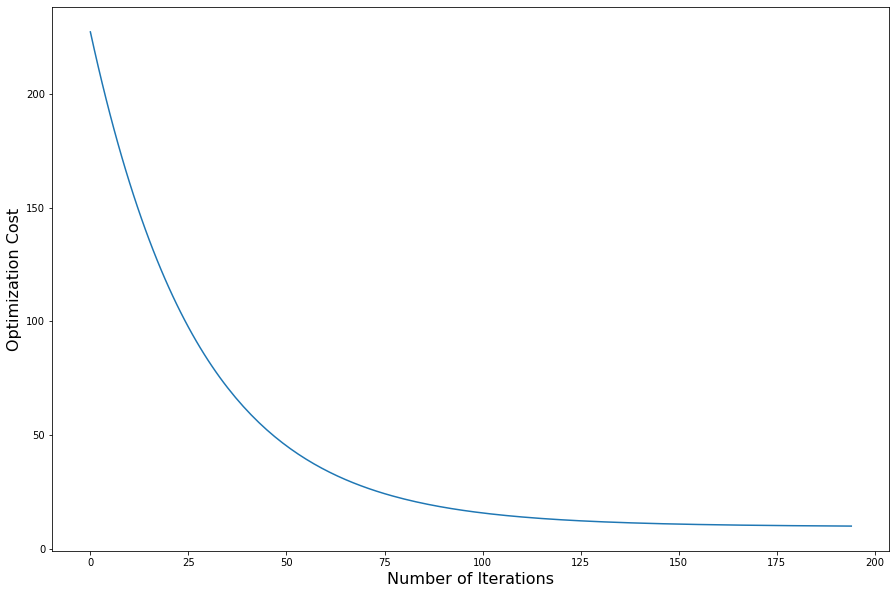

In [25]:
# Your code here
x = trip_dist
y = fare_amount

m_current = 0
c_current = 0

learningRate = 0.001
num_iteration = 400
precision = 0.01

n = float(len(y))
print("Sample size", n)

oldCost=0
xx, costHist = [], [] 
y_prediction = m_current * x + c_current
initCost= (1/n) * sum (( y_prediction - y)**2)



for i in range(num_iteration):
    
    y_prediction = m_current * x + c_current
    cost= (1/n)*sum (( y - y_prediction)**2)
    
    m_gradient = (1.0/n) * sum (x * (y_prediction - y))
    c_gradient = (1.0/n) * sum (y_prediction - y)
    
    m_current = m_current - learningRate * m_gradient
    c_current = c_current - learningRate * c_gradient
    
    if(abs(cost - oldCost) <= precision):
        print("Stoped at iteration", i)
        break
        

    xx.append(i)
    costHist.append(cost)    
    
    oldCost = cost
    
    #ax2.plot(xx, costHist, color='blue')
    #fig.canvas.draw()

    if(i % 10 ==0):
        print("Iteration No.=", i ," m = ", m_current, " c=", c_current, " Cost=", cost) 
        
plt.figure(figsize = (15,10))
plt.plot(xx, costHist)
plt.xlabel("Number of Iterations", fontsize = 16)
plt.ylabel("Optimization Cost", fontsize = 16)
plt.show

    


print("Regression Coefficients: slope(coefficient) = ", m_current, " Intercept=", c_current)
print("Equation: Y = {:.3f}X + {:.3f}".format(float(m_current),float(c_current)))
